### Q3: Total sales in Barisal

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


In [34]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT s.division, s.district, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"WHERE s.division = 'BARISAL' " \
"GROUP BY CUBE(s.division, s.district) "\
"ORDER BY s.division, s.district "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Division','District', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
df = df.dropna()
df
# X = df.iloc[:, -2].values
# Y = df.iloc[:, 1].values
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X,Y)
# plt.show()

Successfully connected to the database


,Division,District,Sales
0,BARISAL,BARGUNA,869041.00
3,BARISAL,BARISAL,2897237.75
4,BARISAL,BHOLA,1012205.75
6,BARISAL,JHALOKATI,570807.25
9,BARISAL,PATUAKHALI,1152629.00
11,BARISAL,PIROJPUR,1018423.00


Text(0, 0.5, 'Total Sales in each month')

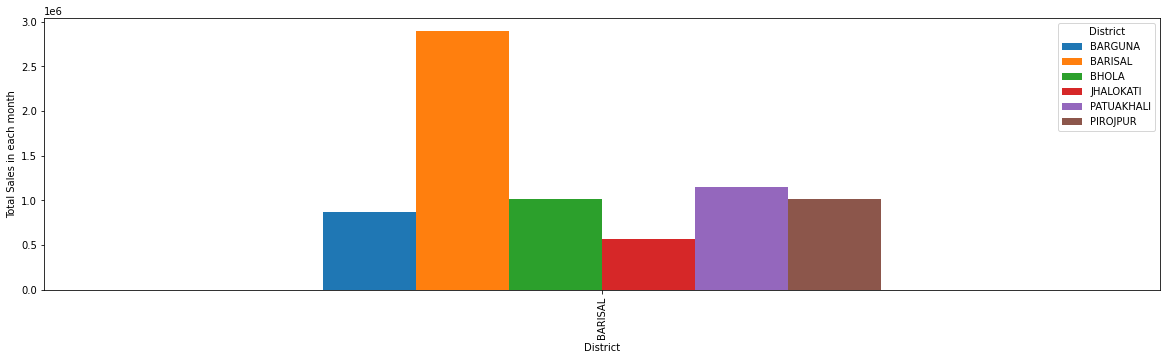

In [35]:
df_pivot = pd.pivot_table(df, values="Sales", index="Division", columns="District")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 5)

ax.set_xlabel("District")
ax.set_ylabel("Total Sales in each month")


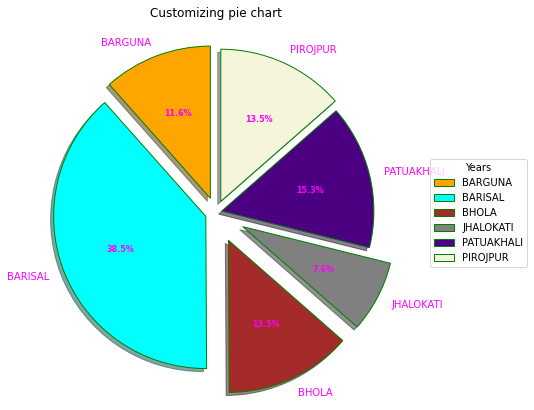

In [29]:
x = df.District
y = df.Sales
# Creating explode data
explode = (0.1, 0.07, 0.2, 0.2, 0.04, 0.08)

# Creating color parameters
colors = ( "orange", "cyan", "brown","grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y,
                                  autopct = lambda pct: func(pct, y),
                                  explode = explode,
                                  labels = x,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, x,
          title ="Years",
          loc ="center left",
          bbox_to_anchor =(1.05, 0, 0.8, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()

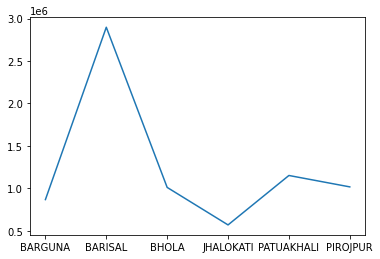

In [16]:
x = df.District
y = df.Sales
plt.plot(x, y) 
plt.show() 

In [19]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT tim.year, tim.month, COUNT(t.quantity), SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"WHERE s.district = 'BARISAL' " \
"GROUP BY tim.month, tim.year "\
"ORDER BY tim.month, tim.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Year','Month','NoOfProduct', 'Sales'])
df
# df = df.dropna()
# X = df.iloc[:, -2].values
# Y = df.iloc[:, 1].values
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X,Y)
# plt.show()

Successfully connected to the database


,Year,Month,NoOfProduct,Sales
0,2014,1,131,14424.00
1,2015,1,297,31446.50
2,2016,1,329,34282.50
3,2017,1,358,36668.75
4,2018,1,322,32894.50
...,...,...,...,...
80,2016,12,305,31428.75
81,2017,12,312,32450.50
82,2018,12,336,37172.75
83,2019,12,317,33651.25


Text(0, 0.5, 'Total Sales in each month')

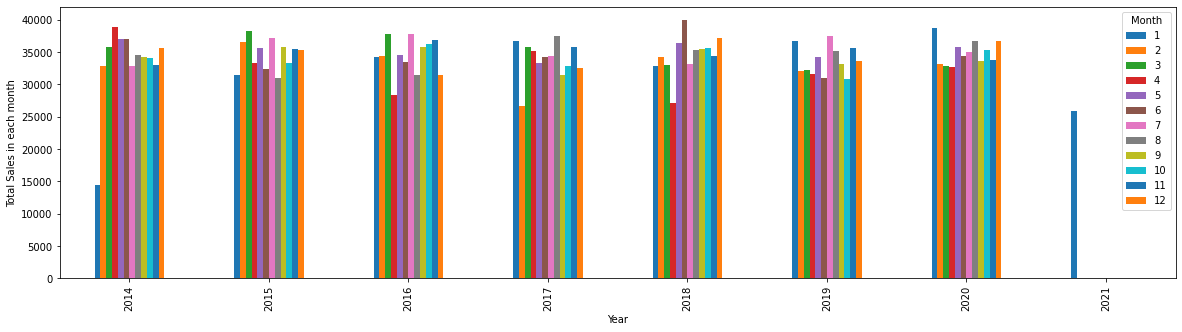

In [20]:
df_pivot = pd.pivot_table(df, values="Sales", index="Year", columns="Month")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 5)

ax.set_xlabel("Year")
ax.set_ylabel("Total Sales in each month")
